In [50]:
import torch
from torch import nn,optim
import torch.nn.functional as F
import numpy as np
from torchvision import datasets, transforms
import cv2
import matplotlib.pyplot as plt
# Importing all the necessary libraries

In [6]:
# Define transform and normalizing the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

# Installing the training set
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

Extracting /home/arihant/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /home/arihant/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /home/arihant/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /home/arihant/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /home/arihant/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /home/arihant/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /home/arihant/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /home/arihant/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


In [16]:
def imshow(image, ax=None, title=None, normalize=True):
  if ax is None:
      fig, ax = plt.subplots()
  image = image.numpy().transpose((1, 2, 0))

  if normalize:
      mean = np.array([0.485, 0.456, 0.406])
      std = np.array([0.229, 0.224, 0.225])
      image = std * image + mean
      image = np.clip(image, 0, 1)

  ax.imshow(image)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.tick_params(axis='both', length=0)
  ax.set_xticklabels('')
  ax.set_yticklabels('')

  return ax

<built-in method size of Tensor object at 0x7fd1c82bee58>


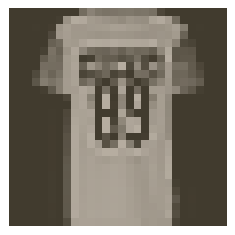

In [25]:
# Let us check one of the sample
imshow(image[1,:])


In [30]:
image[0,:].shape
# So, the image is 28x28 or 784 when we shall flatten it.

torch.Size([1, 28, 28])

In [31]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
    
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim = 1)
        
        return x

In [32]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

In [35]:
# Training:

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Training Loss = {running_loss/len(trainloader)}")
    

Training Loss = 0.5179822319733308
Training Loss = 0.394021013827085
Training Loss = 0.35546283607385054
Training Loss = 0.33301535721367864
Training Loss = 0.3219078915602744


In [48]:
def view_classify(img, ps, version="Fashion"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)


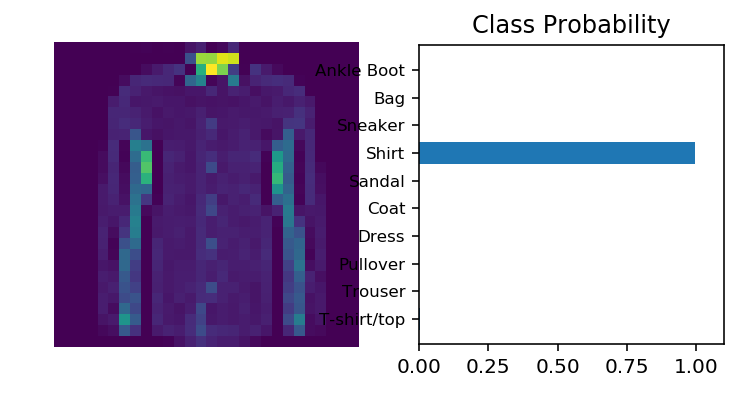

In [49]:

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

view_classify(img,ps)